In [2]:
import pandas as pd

In [4]:
df = pd.read_csv("/content/produtos_agricolas.csv")

In [6]:
df.head()

,N,P,K,temperature,humidity,ph,rainfall,label
0,90,42,43,20.879744,82.002744,6.502985,202.935536,rice
1,85,58,41,21.770462,80.319644,7.038096,226.655537,rice
2,60,55,44,23.004459,82.320763,7.840207,263.964248,rice
3,74,35,40,26.491096,80.158363,6.980401,242.864034,rice
4,78,42,42,20.130175,81.604873,7.628473,262.717340,rice


In [7]:
df.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 2200 entries, 0 to 2199
Data columns (total 8 columns):
 #   Column       Non-Null Count  Dtype  
---  ------       --------------  -----  
 0   N            2200 non-null   int64  
 1   P            2200 non-null   int64  
 2   K            2200 non-null   int64  
 3   temperature  2200 non-null   float64
 4   humidity     2200 non-null   float64
 5   ph           2200 non-null   float64
 6   rainfall     2200 non-null   float64
 7   label        2200 non-null   object 
dtypes: float64(4), int64(3), object(1)
memory usage: 137.6+ KB


In [8]:
df['label'].unique()

array(['rice', 'maize', 'chickpea', 'kidneybeans', 'pigeonpeas',
       'mothbeans', 'mungbean', 'blackgram', 'lentil', 'pomegranate',
       'banana', 'mango', 'grapes', 'watermelon', 'muskmelon', 'apple',
       'orange', 'papaya', 'coconut', 'cotton', 'jute', 'coffee'],
      dtype=object)

In [10]:
import matplotlib.pyplot as plt
import seaborn as sns

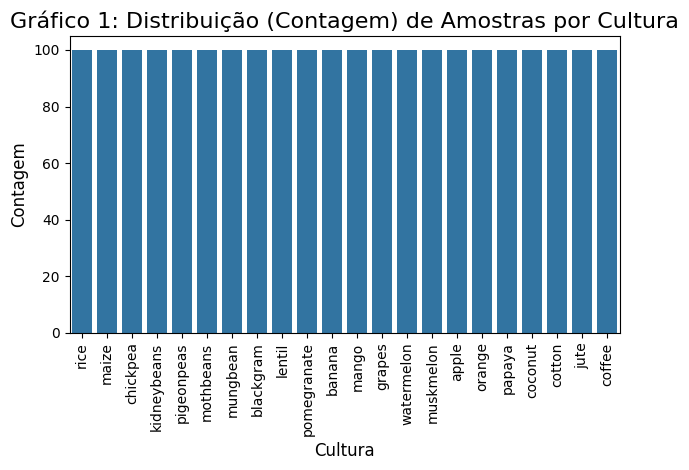

In [11]:
sns.countplot(data=df, x='label')
plt.title('Gráfico 1: Distribuição (Contagem) de Amostras por Cultura', fontsize=16)
plt.xlabel('Cultura', fontsize=12)
plt.ylabel('Contagem', fontsize=12)

plt.xticks(rotation=90)

plt.tight_layout()
plt.savefig('grafico_1_distribuicao_culturas.png')
plt.show()

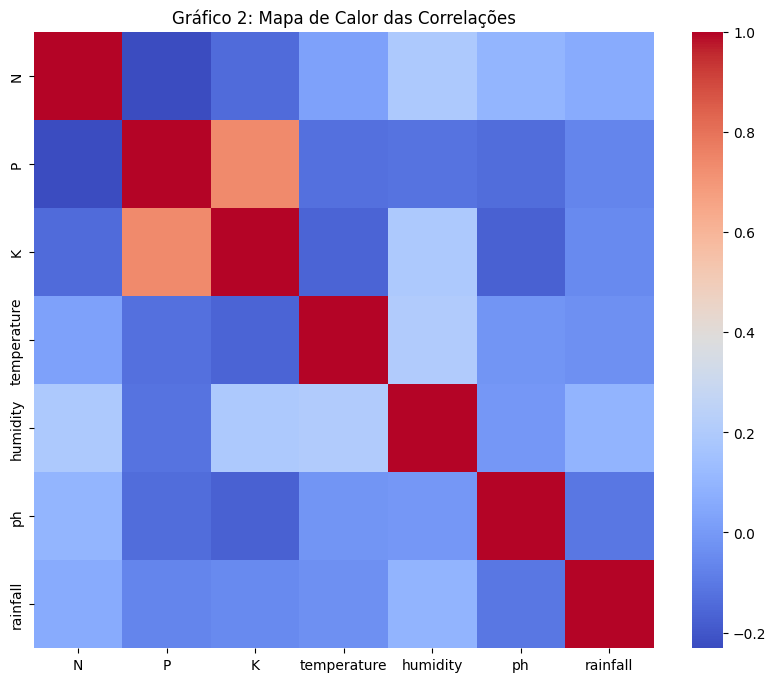

In [18]:
df_numeric = df.drop('label', axis=1)
corr = df_numeric.corr()
plt.figure(figsize=(10,8))

sns.heatmap(corr, annot=False, cmap='coolwarm')
plt.title("Gráfico 2: Mapa de Calor das Correlações")
plt.show()

([0,
  1,
  2,
  3,
  4,
  5,
  6,
  7,
  8,
  9,
  10,
  11,
  12,
  13,
  14,
  15,
  16,
  17,
  18,
  19,
  20,
  21],
 [Text(0, 0, 'rice'),
  Text(1, 0, 'maize'),
  Text(2, 0, 'chickpea'),
  Text(3, 0, 'kidneybeans'),
  Text(4, 0, 'pigeonpeas'),
  Text(5, 0, 'mothbeans'),
  Text(6, 0, 'mungbean'),
  Text(7, 0, 'blackgram'),
  Text(8, 0, 'lentil'),
  Text(9, 0, 'pomegranate'),
  Text(10, 0, 'banana'),
  Text(11, 0, 'mango'),
  Text(12, 0, 'grapes'),
  Text(13, 0, 'watermelon'),
  Text(14, 0, 'muskmelon'),
  Text(15, 0, 'apple'),
  Text(16, 0, 'orange'),
  Text(17, 0, 'papaya'),
  Text(18, 0, 'coconut'),
  Text(19, 0, 'cotton'),
  Text(20, 0, 'jute'),
  Text(21, 0, 'coffee')])

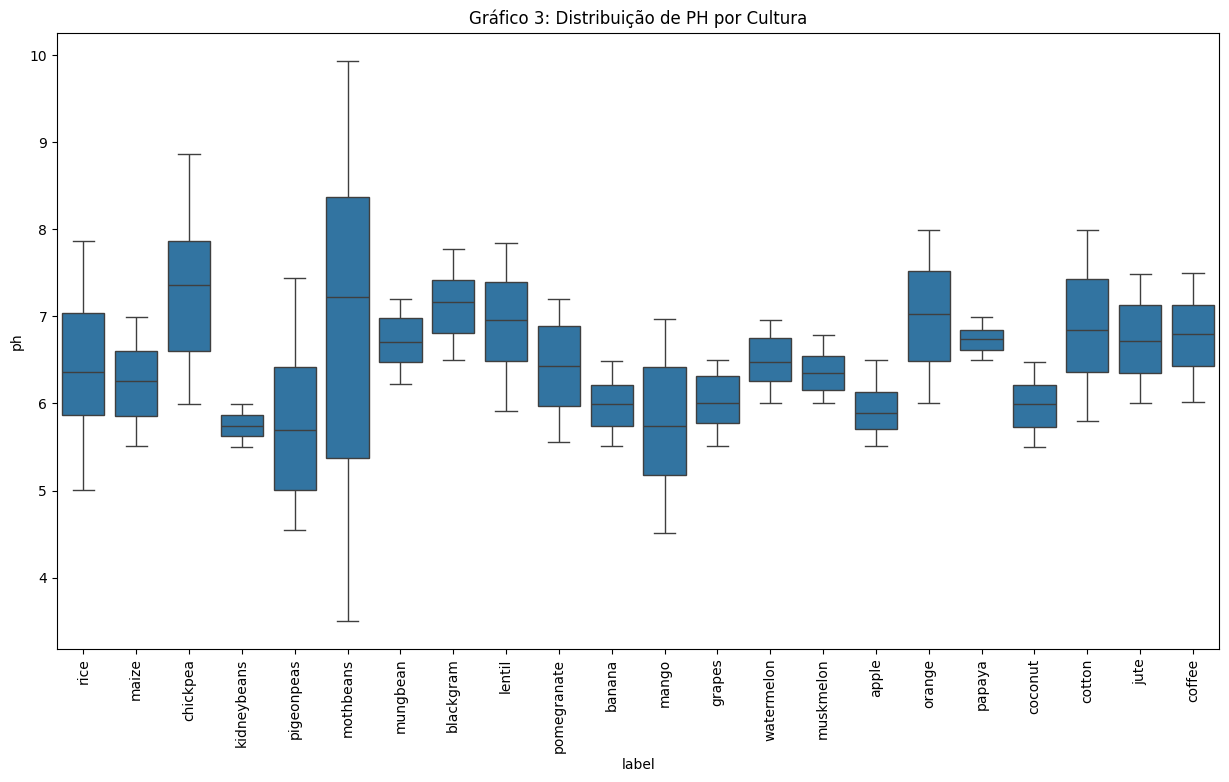

In [19]:
plt.figure(figsize=(15,8))
sns.boxplot(data=df, x='label', y='ph')

plt.title("Gráfico 3: Distribuição de PH por Cultura")
plt.xticks(rotation=90)

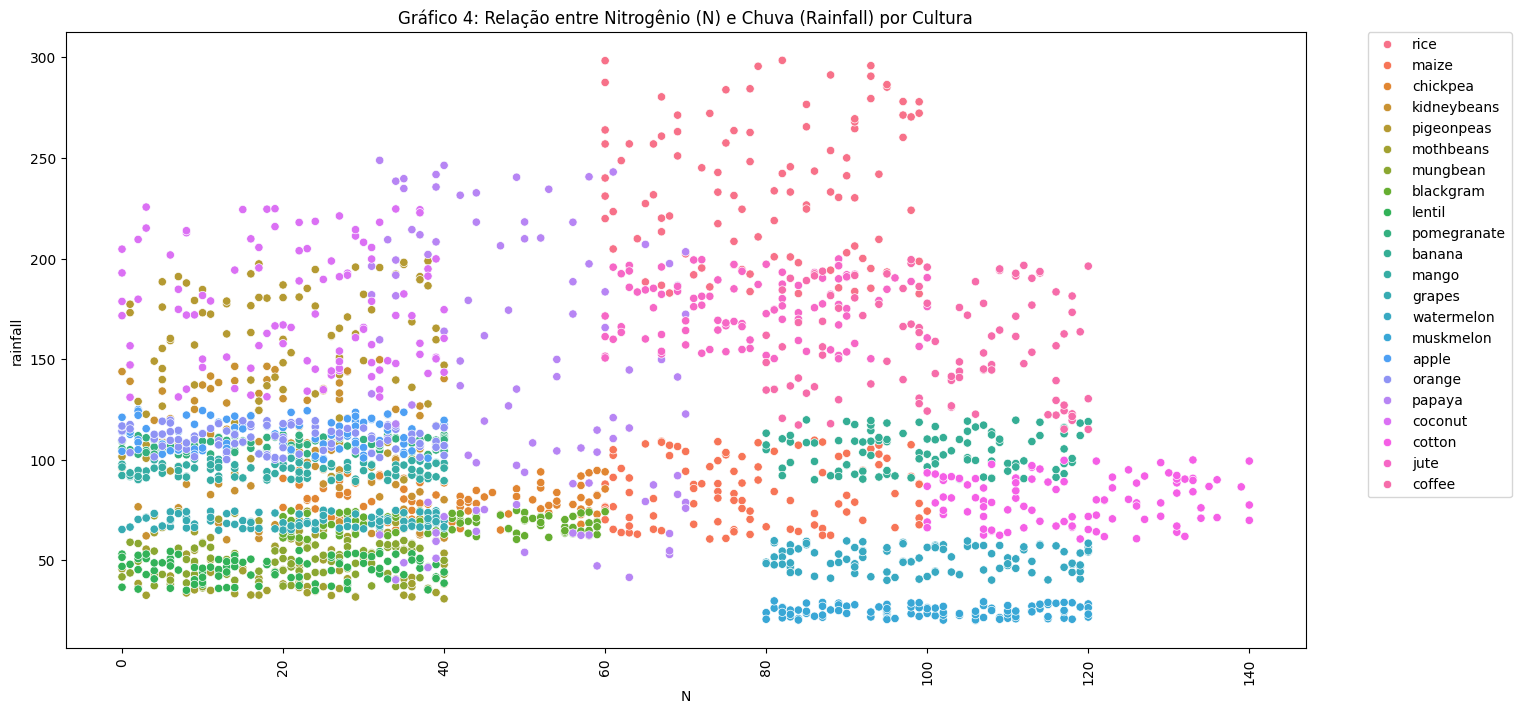

In [29]:
plt.figure(figsize=(16,8))
sns.scatterplot(data=df, x='N', y='rainfall', hue='label')

plt.title('Gráfico 4: Relação entre Nitrogênio (N) e Chuva (Rainfall) por Cultura')
plt.xticks(rotation=90)
plt.legend(bbox_to_anchor=(1.05, 1), loc=2, borderaxespad=0.)
plt.show()

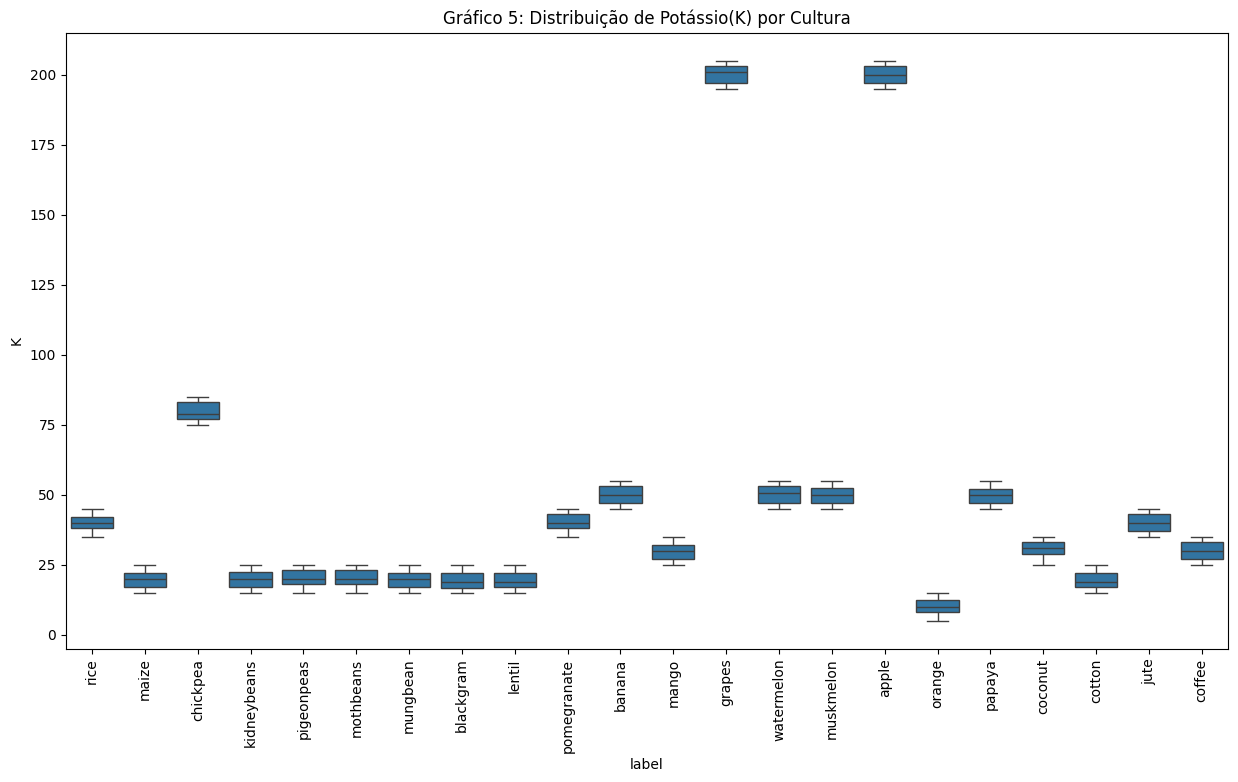

In [42]:
plt.figure(figsize=(15,8))
sns.boxplot(data=df, x='label', y='K')

plt.title("Gráfico 5: Distribuição de Potássio(K) por Cultura")
plt.xticks(rotation=90)
plt.show()

In [35]:
y = df['label']
X= df.drop('label', axis=1)


In [37]:
from sklearn.preprocessing import LabelEncoder

le = LabelEncoder()
y_codificado = le.fit_transform(y)

from sklearn.model_selection import train_test_split
X_train, X_test, y_train, y_test = train_test_split(X, y_codificado, test_size=0.2, random_state=42)

from sklearn.preprocessing import StandardScaler
scaler = StandardScaler()
X_train_scaled = scaler.fit_transform(X_train)
X_test_scaled = scaler.transform(X_test)

In [46]:
#Modelo 1: O Clássico (Regressão Logística)
from sklearn.linear_model import LogisticRegression

modelo_lr = LogisticRegression(max_iter=1000)
modelo_lr.fit(X_train_scaled, y_train) # Quais são os 2 dados de TREINO?
previsoes_lr = modelo_lr.predict(X_test_scaled)

from sklearn.metrics import accuracy_score
acuracia_lr = accuracy_score(previsoes_lr, y_test)

print(f"Acurácia da Regressão Logística: {acuracia_lr:.4f}")

Acurácia da Regressão Logística: 0.9636


In [56]:
#Modelo 2: K-Nearest Neighbors (KNN)
from sklearn.neighbors import KNeighborsClassifier

modelo_knn =  KNeighborsClassifier()
modelo_knn.fit(X_train_scaled, y_train)
knn = modelo_knn.predict(X_test_scaled)
acuracia_knn = accuracy_score(knn, y_test)

print(f"Acurácia do KNN: {acuracia_knn:.4f}")

Acurácia do KNN: 0.9568


In [57]:
#Modelo 3: Árvore de Decisão (Decision Tree).
from sklearn.tree import DecisionTreeClassifier


modelo_tree = DecisionTreeClassifier(random_state=42)
modelo_tree.fit(X_train_scaled, y_train)
previsoes_tree = modelo_tree.predict(X_test_scaled)
acuracia_tree = accuracy_score(previsoes_tree, y_test)

print(f"Acurácia da Árvore de Decisão: {acuracia_tree:.4f}")

Acurácia da Árvore de Decisão: 0.9864


In [61]:
#Modelo 4: Random Forest (Floresta Aleatória).

from sklearn.ensemble import RandomForestClassifier

modelo_forest = RandomForestClassifier()
modelo_forest.fit(X_train_scaled, y_train)
forest = modelo_forest.predict(X_test_scaled)
acuracia_forest = accuracy_score(forest, y_test)

print(f"Acurácia da Random Forest: {acuracia_forest:.4f}")

Acurácia da Random Forest: 0.9932


In [62]:
#Modelo 5: Support Vector Machine (SVM)
from sklearn.svm import SVC

modelo_svc = SVC()
modelo_svc.fit(X_train_scaled, y_train)
svc = modelo_svc.predict(X_test_scaled)
acuracia_svc = accuracy_score(svc,y_test)

print(f"Acurácia Support Vector Machine: {acuracia_svc:.4f}")

Acurácia Support Vector Machine: 0.9682


Placar Final:

Modelo 4 (Random Forest): 99,32% 🏆

Modelo 3 (Árvore de Decisão): 98,64%

Modelo 5 (SVM): 96,82%

Modelo 1 (Regressão Logística): 96,36%

Modelo 2 (KNN): 95,68%